In [72]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("listings_new_york_2024.csv")

data.sample(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
25667,725174632104784756,Bright & Modern Unit- Near Central Park North ...,48863708,Tyrone,Manhattan,East Harlem,40.79283,-73.9398,Entire home/apt,225.0,30,37,2023-12-03,1.73,2,365,12,NaN


In [12]:
rows, columns = data.shape
print("rows = ", rows)
print("columns = ", columns)

rows =  37765
columns =  18


In [17]:
#display columns data types
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [19]:
#summary statistics
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.776500e+04,3.776500e+04,37765.000000,37765.000000,23044.000000,37765.000000,37765.000000,26014.000000,37765.000000,37765.000000,37765.000000
mean,3.653038e+17,1.659684e+08,40.729075,-73.947084,221.074900,29.164597,24.898981,0.905544,53.763035,152.411598,3.993168
std,4.539908e+17,1.800529e+08,0.056343,0.054458,766.620992,30.202538,58.802122,1.860784,161.979723,142.797333,15.762591
min,2.595000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.055254e+07,1.662776e+07,40.688800,-73.983220,86.000000,30.000000,0.000000,0.090000,1.000000,0.000000,0.000000
50%,4.826382e+07,8.218953e+07,40.726440,-73.954540,150.000000,30.000000,3.000000,0.320000,2.000000,126.000000,0.000000
75%,8.276380e+17,3.031569e+08,40.762470,-73.928022,250.000000,30.000000,21.000000,1.130000,8.000000,301.000000,3.000000
max,1.193086e+18,5.869174e+08,40.911390,-73.713650,100000.000000,1250.000000,1915.000000,103.530000,842.000000,365.000000,1568.000000


In [39]:
categorical_columns = data.select_dtypes(include=['object', 'category'])

for col in categorical_columns:
    print("Column:", col)

    unique_values = data[col].nunique()
    print("Count unique values:",unique_values)

    modes = data[col].mode()
    mode_count = data[col].value_counts()
    
    #check if there are at least 2 modes
    if len(modes) > 1:
        mode1 = modes[0]
        mode2 = modes[1]
    else:
        mode1 = modes[0]
        mode2 = None
    
    mode1_frequency = mode_count.get(mode1,0)
    mode2_frequency = mode_count.get(mode2, 0)

    print("First Mode:", mode1)
    print("First Mode Frequency:", mode1_frequency)

    print("Second Mode:",mode2)
    print("Second Mode Frequency:", mode2_frequency)

    print()

Column: name
Count unique values: 36050
First Mode: Water View King Bed Hotel Room
First Mode Frequency: 30
Second Mode: None
Second Mode Frequency: 0

Column: host_name
Count unique values: 8534
First Mode: Blueground
First Mode Frequency: 842
Second Mode: None
Second Mode Frequency: 0

Column: neighbourhood_group
Count unique values: 5
First Mode: Manhattan
First Mode Frequency: 16715
Second Mode: None
Second Mode Frequency: 0

Column: neighbourhood
Count unique values: 225
First Mode: Bedford-Stuyvesant
First Mode Frequency: 2709
Second Mode: None
Second Mode Frequency: 0

Column: room_type
Count unique values: 4
First Mode: Entire home/apt
First Mode Frequency: 20023
Second Mode: None
Second Mode Frequency: 0

Column: last_review
Count unique values: 3059
First Mode: 2024-07-01
First Mode Frequency: 341
Second Mode: None
Second Mode Frequency: 0

Column: license
Count unique values: 1732
First Mode: Exempt
First Mode Frequency: 2872
Second Mode: None
Second Mode Frequency: 0



In [48]:
missing_data = data.isnull().sum()
missing_percentage = (missing_data /data.shape[0]) * 100

missing_df = pd.DataFrame({
    'Missing Data' : missing_data,
    'Missing Percentage' : missing_percentage},
    index= data.columns
)
print(missing_df)

                                Missing Data  Missing Percentage
id                                         0            0.000000
name                                       2            0.005296
host_id                                    0            0.000000
host_name                                  5            0.013240
neighbourhood_group                        0            0.000000
neighbourhood                              0            0.000000
latitude                                   0            0.000000
longitude                                  0            0.000000
room_type                                  0            0.000000
price                                  14721           38.980538
minimum_nights                             0            0.000000
number_of_reviews                          0            0.000000
last_review                            11751           31.116113
reviews_per_month                      11751           31.116113
calculated_host_listings_

In [68]:
columns_to_check = data.select_dtypes(include=['float64', 'int64']).columns.difference(['id', 'host_id'])

def count_outliers_pandas(data, column):
	Q1 = data[column].quantile(0.25)
	Q3 = data[column].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
	return outliers.shape[0]

outliers_counts= {}

for col in columns_to_check:
	outliers_counts[col] = count_outliers_pandas(data, col)

for col, count in outliers_counts.items():
	print("Potential outliers in",col,":",count)

Potential outliers in availability_365 : 0
Potential outliers in calculated_host_listings_count : 7104
Potential outliers in latitude : 410
Potential outliers in longitude : 2601
Potential outliers in minimum_nights : 7317
Potential outliers in number_of_reviews : 5072
Potential outliers in number_of_reviews_ltm : 5321
Potential outliers in price : 1437
Potential outliers in reviews_per_month : 2188


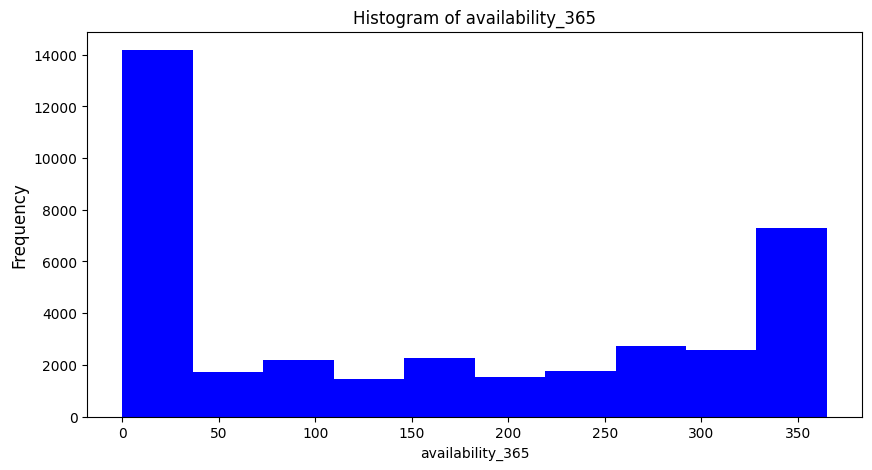

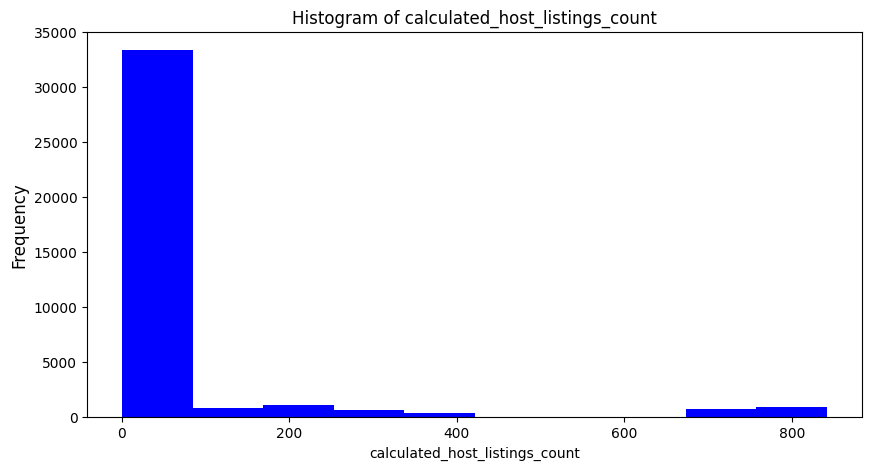

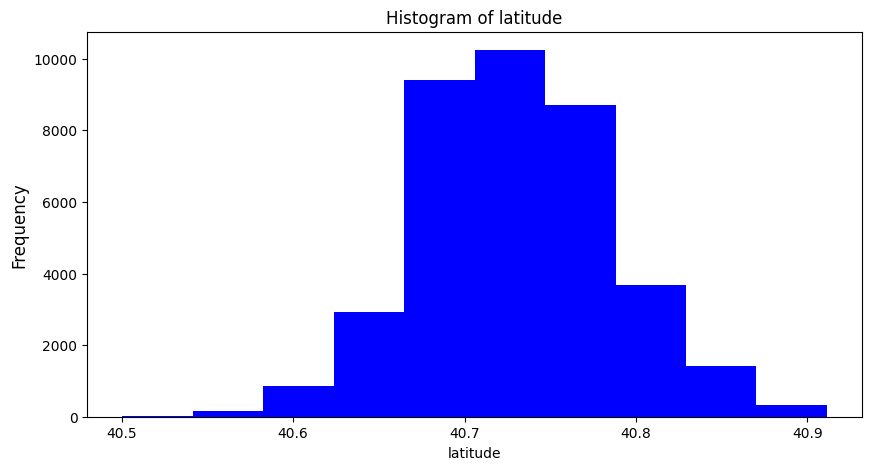

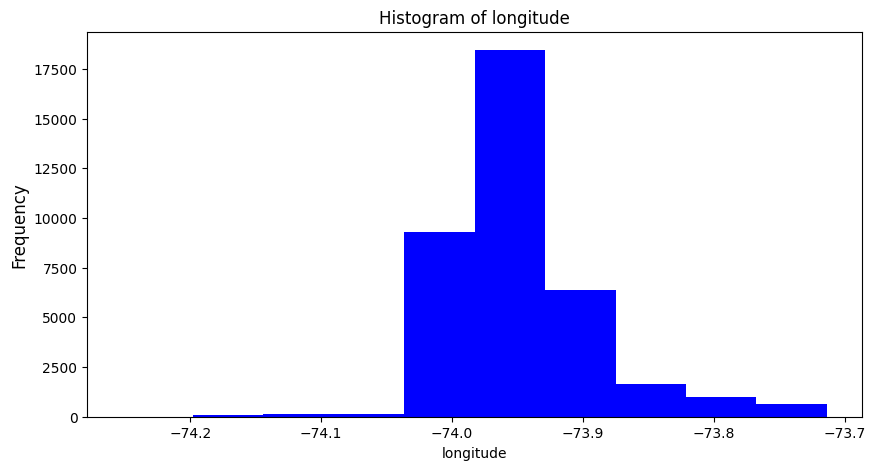

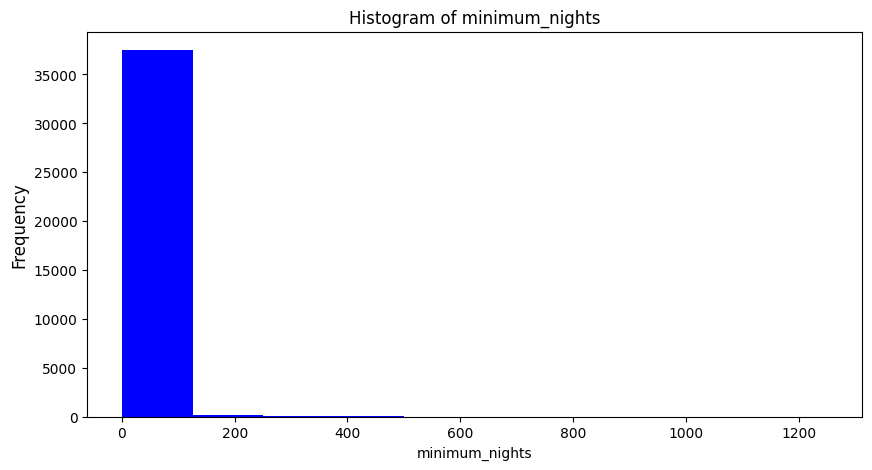

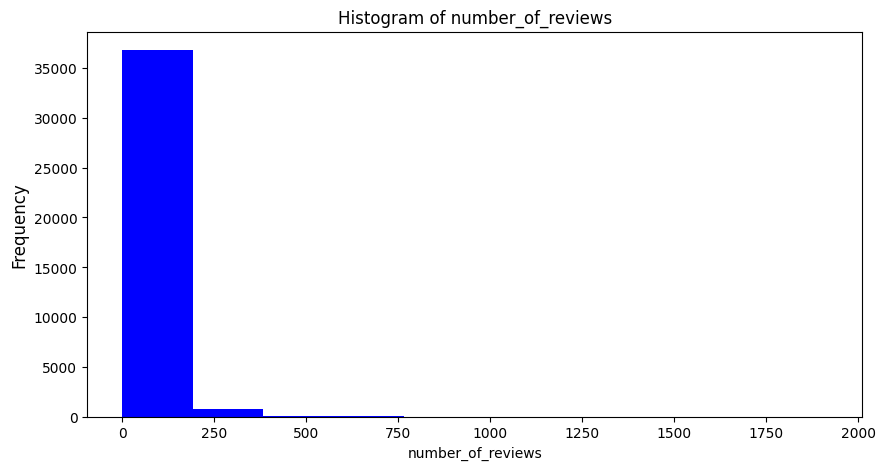

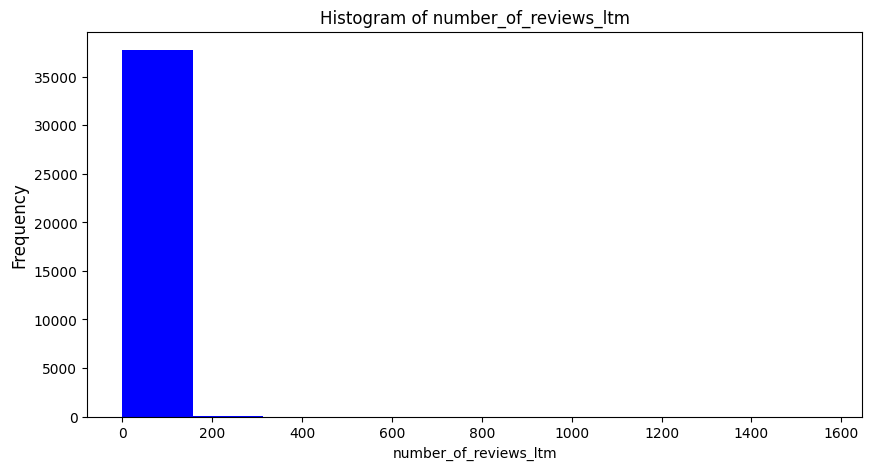

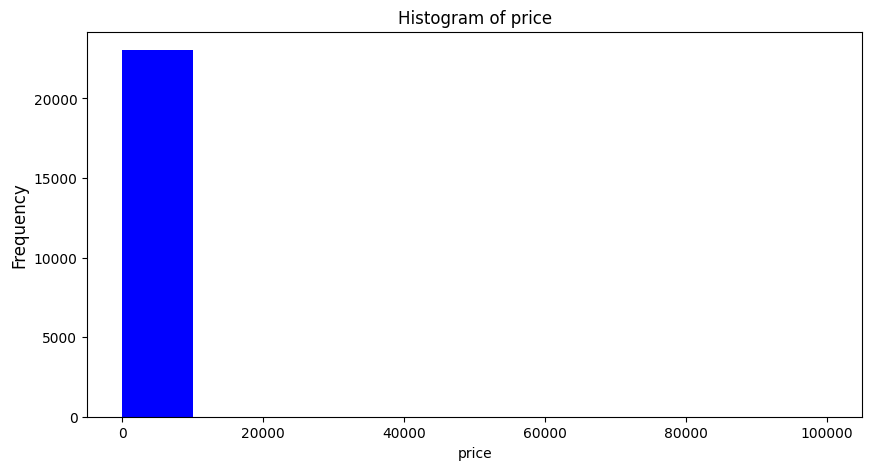

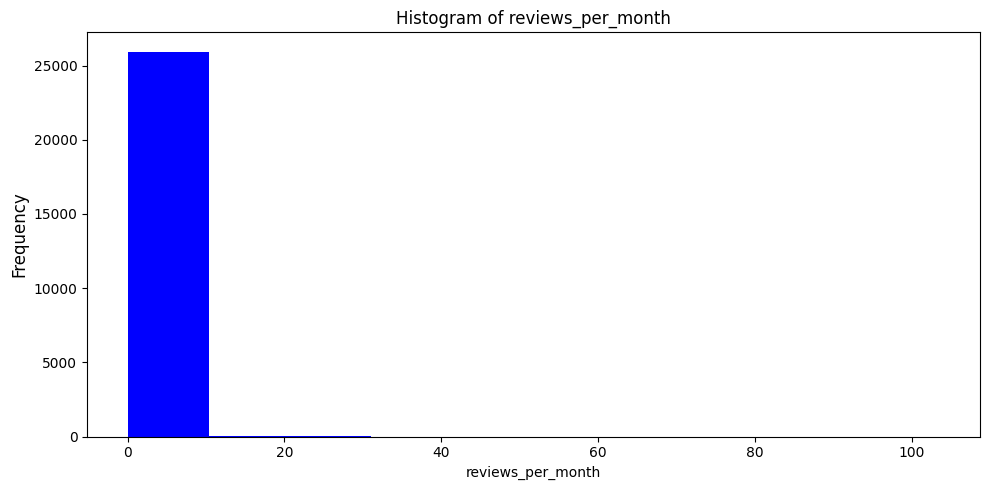

In [84]:
numerical_cols = data.select_dtypes(include=['float64','int64']).columns.difference(['id', 'host_id'])

for i,col in enumerate(numerical_cols):
    plt.figure(figsize=(10,5))
    plt.hist(data[col],bins=10, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout() 